In [2]:
import pandas as pd
df=pd.read_csv("d:/learn/data/wine_new.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,0
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3,0
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3,0
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,0
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,0


In [4]:
train_cols=df.columns[0:11] #0~10
X=df[train_cols] #독립변수
y=df["quality"] #종속변수

In [5]:
#오버샘플링
from imblearn.over_sampling import SMOTE
X_sample,y_sample=SMOTE(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=["quality"])
df2=pd.concat([X_samp,y_samp],axis=1)

In [4]:
df2["quality"].value_counts()

7    681
5    681
3    681
8    681
6    681
4    681
Name: quality, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
    stratify=y,random_state=10)


Text(0.5, 0, 'number of clusters')

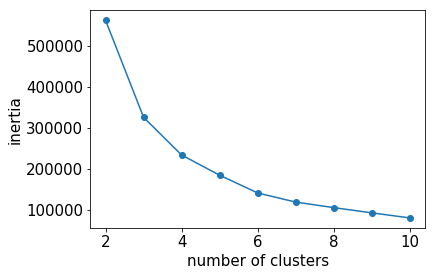

In [9]:
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

clusters=range(2,11) #2~10개의 클러스터 
# inertias 중심과 각 데이터의 거리를 모두 합산한 값
inertias=[] 
for n in clusters:
    model=KMeans(n_clusters=n, random_state=10) #군집 모형 생성
    model.fit(X_train) #군집 나누기
    # 중심값과 떨어진 모든 값들의 합 : 떨어져있으면 분산이 크다는 의미
    inertias.append(model.inertia_) 
    
plt.rcParams["font.size"]=15
plt.plot(clusters,inertias,"-o")
plt.ylabel("inertia")
plt.xlabel("number of clusters")
#엘보우 기법(팔꿈치처럼 꺾이는 부분이 최적의 k)

In [10]:
model=KMeans(n_clusters=3,random_state=10)
model.fit(X_train)
pred=model.predict(X_test)

In [11]:
from sklearn.metrics import silhouette_score
silhouette_score(X_test,pred)

0.5420626010564639

In [12]:
model=KMeans(n_clusters=6,random_state=10)
model.fit(X_train)
pred=model.predict(X_test)

In [13]:
from sklearn.metrics import silhouette_score
silhouette_score(X_test,pred)

0.45689331624772384

C:\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


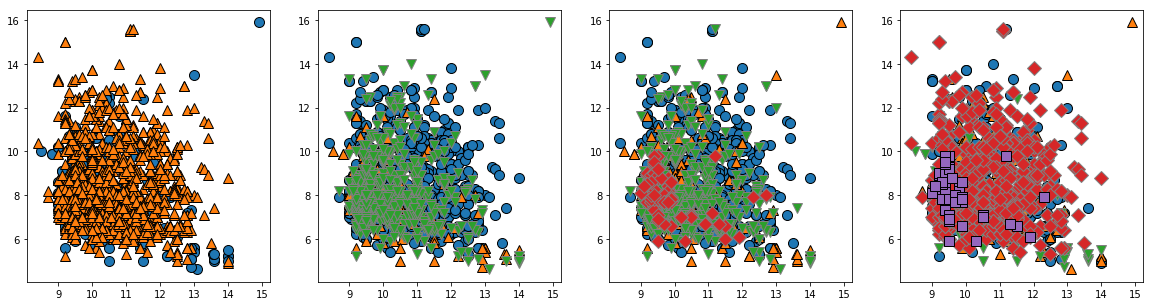

In [14]:
import mglearn
from matplotlib import pyplot as plt
#1행 4열의 서브플롯
fig,axes=plt.subplots(1,4,figsize=(20,5)) 
idx=0
for k in [2,3,4,5]: #군집의 갯수 2~5
    kmeans=KMeans(n_clusters=k) #군집갯수 입력
    kmeans.fit(X) #학습
    lbls=kmeans.labels_ #모형에서 분류한 클래스
    #산점도 그리기
    mglearn.discrete_scatter(X["alcohol"],X["fixed acidity"],lbls,
                             ax=axes[idx])
    idx += 1